<a href="https://colab.research.google.com/github/Frank-Sir/CapstoneFrank-sTester/blob/main/Copy_of_CapstoneTA_Ai_Trails_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

from sklearn import linear_model
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

import IPython



!pip install tensorflowjs 
import tensorflowjs as tfjs
import seaborn as sea
%matplotlib inline

In [ ]:

#Nerual Network time. 
#'Tony_Alder_SetsCombined_DROP_MAKEUP.csv','Tony_Alder_SetsCombined_OverUnder_80_DropMakeup.csv','Tony_Alder_SetsCombined_OverUnder_DropMakeup.csv'
#files=['Tony_Alder_SetsCombined.csv','Tony_Alder_SetsCombined_DROP_MAKEUP.csv','Tony_Alder_SetsCombined_OverUnder.csv','Tony_Alder_SetsCombined_OverUnder_80.csv','Tony_Alder_SetsCombined_OverUnder_80_DropMakeup.csv','Tony_Alder_SetsCombined_OverUnder_DropMakeup.csv']
#df=pd.read_csv('Tony_Alder_SetsCombined_OverUnder_DropMakeup.csv',na_values='!')
df=pd.read_csv('Tony_Alder_SetsCombined_OverUnder_80.csv',na_values='!')
#df=pd.read_csv('Tony_Alder_SetsCombined_DROP_MAKEUP.csv',na_values='!')
#df=pd.read_csv('Tony_Alder_SetsCombined.csv',na_values='!')
#dfs=[]
#df=pd.read_csv('Tony_Alder_SetsCombined.csv',na_values='!')
df.describe()

,pH,ORP,MakeupWater,FAC,TC,CC,Temp,TA
count,87.000000,85.000000,55.000000,86.000000,78.000000,78.000000,84.000000,87.000000
mean,7.403793,822.976471,4.098364,2.545233,3.354231,0.818462,82.345238,0.022989
std,0.072308,12.064289,5.857434,0.780357,0.725592,0.337285,2.246786,0.150736
min,7.100000,800.000000,0.000000,1.180000,2.000000,0.380000,79.000000,0.000000
25%,7.400000,815.000000,0.590000,2.000000,2.860000,0.500000,81.000000,0.000000
50%,7.400000,825.000000,2.000000,2.500000,3.420000,0.800000,81.000000,0.000000
75%,7.400000,830.000000,5.448000,3.000000,3.800000,1.000000,85.000000,0.000000
max,7.600000,855.000000,31.851000,5.190000,5.840000,2.330000,86.000000,1.000000


In [ ]:
df=df.dropna()
features=df.drop(['TA'],axis='columns')
label=df['TA']
#features=StandardScaler().fit_transform(features)
label=pd.get_dummies(label, columns=["TA"])
print(features.shape,'  ',label.shape)

(46, 7)    (46, 2)


In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(features,label,test_size=0.1)
  X_train=tf.convert_to_tensor(X_train)
  X_test=tf.convert_to_tensor(X_test)
  y_train=tf.convert_to_tensor(y_train)
  y_test=tf.convert_to_tensor(y_test)
  y_train.shape

TensorShape([41, 2])

In [ ]:
results=[[],[]]
Smodel = keras.Sequential()
Smodel.add(Dense(10, activation=tf.nn.relu, input_shape=[len(X_train[0])]))
Smodel.add(Dense(16,activation='relu'))
Smodel.add(Dense(8,activation='relu'))
Smodel.add(Dense(2,activation='softmax'))

Smodel.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history=Smodel.fit(X_train, y_train, epochs=600, verbose=0, validation_split=0.2)

temp = pd.DataFrame(history.history)
temp["epoch"] = history.epoch
name='Accuracy over Epoch'
results[0].append(name)
results[1].append(temp)
print(f"results on  {name} 1: \n  Val Accuracy: {round(float(temp['val_accuracy'].tail(1)),3)}\n  Train Accuracy: {round(float(temp['accuracy'].tail(1)),3)}")

print("\n",np.round(Smodel.predict(X_test),0),'\n',y_test,'\n')
#print("\n",Smodel.predict(X_train),'\n',y_train)



results on  Accuracy over Epoch 1: 
  Val Accuracy: 1.0
  Train Accuracy: 0.938

 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 
 tf.Tensor(
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]], shape=(5, 2), dtype=uint8) 



In [ ]:
print(X_test.shape)

(5, 7)


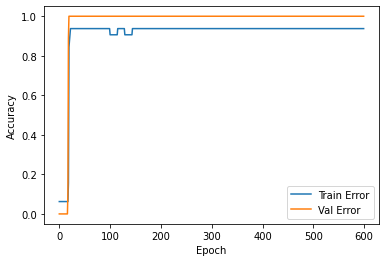

In [ ]:
plot_Acc(temp)

In [ ]:
Smodel.save("SoftMaxModel")

INFO:tensorflow:Assets written to: SoftMaxModel/assets


In [ ]:
reconstructed_model = keras.models.load_model("SoftMaxModel")
alp=tf.Variable(X_test).numpy().tolist()
print(reconstructed_model.predict(alp),'  ',alp)
print(reconstructed_model.predict([7.4, 825.0, 1.0, 2.26, 3.32, 1.06, 85.0]))

[[0.9985671  0.0014329 ]
 [0.998691   0.00130898]
 [0.99791163 0.00208832]
 [0.99827886 0.00172119]
 [0.99858475 0.00141528]]    [[7.4, 825.0, 1.0, 2.26, 3.32, 1.06, 85.0], [7.4, 820.0, 1.0, 1.81, 2.98, 1.17, 85.0], [7.3, 825.0, 0.027000000000000003, 3.0, 3.5, 0.5, 81.0], [7.4, 830.0, 2.0, 2.56, 4.02, 1.46, 85.0], [7.5, 825.0, 2.0, 1.96, 2.86, 0.9, 86.0]]


ValueError: ignored

In [ ]:
results=[[],[]]
Sigmodel = keras.Sequential()
Sigmodel.add(Dense(10, activation=tf.nn.relu, input_shape=[len(X_train[0])]))
Sigmodel.add(Dense(16,activation='relu'))
Sigmodel.add(Dense(8,activation='relu'))
Sigmodel.add(Dense(2,activation='sigmoid'))

Sigmodel.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history=Sigmodel.fit(X_train, y_train, epochs=300, verbose=0, validation_split=0.2)

temp = pd.DataFrame(history.history)
temp["epoch"] = history.epoch
name='Accuracy over Epoch'
results[0].append(name)
results[1].append(temp)
print(f"results on  {name} 1: \n  Val Accuracy: {round(float(temp['val_accuracy'].tail(1)),3)}\n  Train Accuracy: {round(float(temp['accuracy'].tail(1)),3)}")

print("\n",np.round(Sigmodel.predict(X_test),0),'\n',y_test,'\n')
#print("\n",Sigmodel.predict(X_train),'\n',y_train)



results on  Accuracy over Epoch 1: 
  Val Accuracy: 0.889
  Train Accuracy: 1.0

 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]] 
 tf.Tensor(
[[1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]], shape=(5, 2), dtype=uint8) 



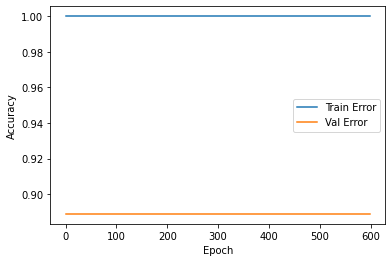

In [ ]:
def plot_Acc(x):#Plotting 
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(x['epoch'], x['accuracy'], label='Train Error')
    plt.plot(x['epoch'], x['val_accuracy'], label='Val Error')
    plt.legend()
plot_Acc(temp)

In [ ]:
tfjs.converters.save_keras_model(Sigmodel, 'NNSigmoidmodels')
tfjs.converters.save_keras_model(Smodel, 'NNSoftMaxmodels')

In [ ]:
yes=0
no=0
i=0
j=0

for i in range(len(models)-1):
  temp=tf.Variable((models[i].predict(test[0][i]))).numpy().tolist()
  print(temp)

  '''
  for j in range(len(temp)-1):
    if temp[j]==test[1][j]:
      yes+=1
    else:
      no+=1
  print(f"Model gave {yes} correct and {no} Wronge. \n Test Accuracy= %{(yes/(yes+no))*100}") 
    '''

[[0.031107662245631218, 0.7123413681983948, 0.25655099749565125], [0.0024622275959700346, 0.46400025486946106, 0.5335374474525452], [0.025829816237092018, 0.20563583076000214, 0.7685343623161316], [8.787420483713504e-06, 0.9995926022529602, 0.00039861255208961666], [0.0048239403404295444, 0.9857670068740845, 0.009409111924469471]]
[[0.0030105127952992916, 0.9097379446029663, 0.08439991623163223, 0.0028515346348285675], [0.03192288056015968, 0.04816041514277458, 0.8828129768371582, 0.03710377216339111], [0.028630392625927925, 0.8663131594657898, 0.08938925713300705, 0.015667326748371124], [0.06331684440374374, 0.7459315061569214, 0.15242893993854523, 0.038322605192661285], [0.03309543430805206, 0.2761090397834778, 0.6478567123413086, 0.042938802391290665], [0.11341641843318939, 0.524425208568573, 0.2947031855583191, 0.06745506823062897], [0.005285253282636404, 0.03819678723812103, 0.9467726945877075, 0.009745234623551369], [0.007376488763839006, 0.847821056842804, 0.1390870064496994, 0.

In [ ]:
!pip install h5py
from keras.models import model_from_json
import os

In [ ]:
model_json = Smodel.to_json()
with open("Soft2dmodel.json", "w") as json_file:
  json_file.write(model_json)
Smodel.save_weights("Soft2model.h5")
print("Saved model to disk")

Saved model to disk
